# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [1]:
import numpy as np
import jax
import matplotlib.pyplot as plt
import sklearn.model_selection
import pandas as pd
D = np.loadtxt('../data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]
X = (X - X.mean(axis=0)) / np.sqrt(X.var(axis=0))


При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [2]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, shuffle=False)

In [3]:
def predict(w, b, X):
    return X @ w.T + b

In [4]:
@jax.jit
def loss(w, b, X, y_expected, alpha):
    predicted = predict(w, b, X)
    return (((y_expected - predicted) ** 2).mean() + alpha * sum(w * w)**2)

In [5]:
grad_loss = jax.jit(jax.grad(loss, argnums=(0, 1)))

In [6]:
def grad_losses(X_train, X_test, y_train, y_test, alpha=0.01):
    w = np.random.randn(4)
    b = np.random.randn(1)
    train_losses = []
    test_losses = []

    lambd = 0.01
    for i in range(500):    
        w_grad, b_grad = grad_loss(w, b, X_train, y_train, alpha)
        
        w -= lambd * w_grad
        b -= lambd * b_grad        
        
        loss_train = loss(w, b, X_train, y_train, alpha)
        loss_test = loss(w, b, X_test, y_test, alpha)
        
        train_losses.append(loss_train)
        test_losses.append(loss_test)
    return train_losses, test_losses

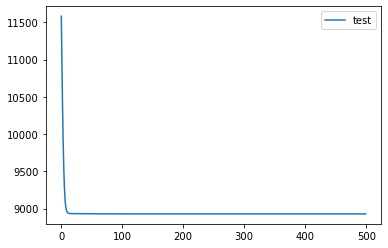

In [7]:
train_losses, test_losses = grad_losses(X_train, X_test, y_train, y_test, alpha=0.01)
ticks = np.arange(len(train_losses))
plt.plot(ticks, test_losses, label='test')
plt.legend()

In [8]:
def cv(l_alpha):
    
    train_loss, test_loss = [], []
    for alpha in l_alpha:
            train_losses, test_losses  = [], [] 
            for i in range(5):
                x = np.split(X, 5)
                y = np.split(Y, 5)
                x_test = np.array(x.pop(i))
                x_train = np.array(x)
                y_test = y.pop(i)
                y_train = np.array(y)
                train_l, test_l = grad_losses(x_train, x_test, y_train, y_test, alpha)
                train_losses.append(train_l)
                test_losses.append(test_l)
            train_loss.append(np.mean(train_losses))
            test_loss.append(np.mean(test_losses))
    return train_loss, test_loss


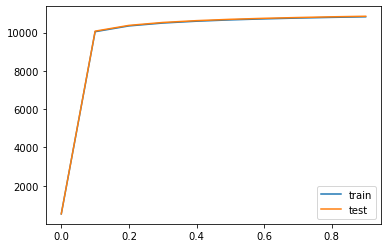

In [10]:
l_alpha = np.arange(0, 1, 0.1)
train_loss, test_loss = cv(l_alpha)
plt.plot(l_alpha, train_loss, label='train')
plt.plot(l_alpha, test_loss, label='test')
plt.legend()